# Python for Data Visualization
---
Exercises based on LinkedIn's *Python for Data Visualization* course found in LinkedIn Learning.

## Tags

### Python
Matplotlib $\diamond$ Seaborn $\diamond$ Numpy

### Jupyter Notebook
%run

### Pandas
dtypes $\diamond$ loc $\diamond$ help

# 1. Load Data

In [137]:
# Load nannose data from
%run Load_nanonose.ipynb

Good job!
	y and X have same dimensions!
----------------------------------------
Nanonose Data Succesfully Loaded
Run %whos to view all imported variables


In [138]:
%whos

Variable               Type           Data/Info
-----------------------------------------------
C                      int            5
KNeighborsClassifier   ABCMeta        <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
M                      int            8
M_train                int            256
Mtest                  int            256
N                      int            90
N_test                 int            2007
N_train                int            7291
X                      DataFrame               A          B    <...>\n\n[90 rows x 8 columns]
X_heatmap              ndarray        16x16: 256 elems, type `float64`, 2048 bytes
X_test                 DataFrame            pixel1  pixel2  pix<...>[2007 rows x 256 columns]
X_train                DataFrame            pixel1  pixel2  pix<...>[7291 rows x 256 columns]
Xdict                  dict           n=5
a                      int            3
attributeNames         list           n=8
axes                   AxesSub

# 2. Get acquainted with/verify you data

In [139]:
X.dtypes

A    float64
B    float64
C    float64
D    float64
E    float64
F    float64
G    float64
H    float64
dtype: object

### .info() is usefull to check if the columns contain null-values
All columns should contain the same numbr of non-null values

In [140]:
# you can see how many non-null values you have
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       90 non-null     float64
 1   B       90 non-null     float64
 2   C       90 non-null     float64
 3   D       90 non-null     float64
 4   E       90 non-null     float64
 5   F       90 non-null     float64
 6   G       90 non-null     float64
 7   H       90 non-null     float64
dtypes: float64(8)
memory usage: 5.8 KB


In [141]:
X.shape

(90, 8)

## Slicing Data

Series means you can slice!

### Index slicing

In [142]:
X['A'][0:10].head()

0    95.5
1    94.5
2    92.0
3    53.0
4    51.0
Name: A, dtype: float64

In [143]:
X[['A']][0:10].head()

,A
0,95.5
1,94.5
2,92.0
3,53.0
4,51.0


In [ ]:
# columns slicing by index
# all columns but the last column
X.columsn[:-1]

### loc slicing
Recommended way of selecting columns

In [144]:
# select all rows in column A
# return dataframe
X.loc[:, ['A']].head()

,A
0,95.5
1,94.5
2,92.0
3,53.0
4,51.0


In [145]:
# select all rows in column A
# return series
X.loc[:, 'A'].head()

0    95.5
1    94.5
2    92.0
3    53.0
4    51.0
Name: A, dtype: float64

## Filtering data

### count row values

In [146]:
X['A'].value_counts().head()

0.000    13
1.000     7
1.500     6
0.500     5
0.416     3
Name: A, dtype: int64

### filer rows

In [147]:
row_filter = X['A'] == 0.000
X[row_filter].head()

,A,B,C,D,E,F,G,H
33,0.0,5.5,1.5,1.687500,12.093750,0.939706,5.744118,1.738983
34,0.0,5.7,1.5,1.687500,12.375000,1.469118,5.856618,1.522286
35,0.0,5.5,1.8,2.250000,12.656250,1.204412,5.697794,1.910615
48,0.0,29.0,8.0,16.666667,17.291667,2.293023,11.969186,9.605241
51,0.0,14.0,4.0,8.673469,7.806122,0.602907,6.454070,3.932056


In [148]:
# using loc (: means all columns)
X.loc[row_filter,:].head()

,A,B,C,D,E,F,G,H
33,0.0,5.5,1.5,1.687500,12.093750,0.939706,5.744118,1.738983
34,0.0,5.7,1.5,1.687500,12.375000,1.469118,5.856618,1.522286
35,0.0,5.5,1.8,2.250000,12.656250,1.204412,5.697794,1.910615
48,0.0,29.0,8.0,16.666667,17.291667,2.293023,11.969186,9.605241
51,0.0,14.0,4.0,8.673469,7.806122,0.602907,6.454070,3.932056


### using a double row filter

In [149]:
X['B'].value_counts().head()

0.0     10
0.5      4
4.0      3
5.5      3
14.0     2
Name: B, dtype: int64

In [150]:
row_filter2 = X['B'] == 0.000

In [151]:
X.loc[row_filter & row_filter2, :]

,A,B,C,D,E,F,G,H
69,0.0,0.0,0.5,0.0,0.0,0.104667,0.080244,0.30
70,0.0,0.0,1.0,0.0,0.0,0.153511,0.362844,0.33
71,0.0,0.0,1.5,0.0,0.0,0.069778,0.366333,0.28


## Managing Columns

### Rename column using 'rename'

In [152]:
# X = X.rename(columns = {'A' : 'Z'})
X.rename(columns = {'A' : 'Z'}, inplace = True)
X.head()

,Z,B,C,D,E,F,G,H
0,95.5,21.0,6.0,11.942308,64.134615,21.498560,5.567840,1.174135
1,94.5,17.0,5.0,5.484615,63.205769,19.658560,4.968000,1.883444
2,92.0,16.0,3.0,11.057692,62.586538,19.813120,5.192480,0.564835
3,53.0,7.5,2.5,3.538462,35.163462,6.876207,1.641724,0.144654
4,51.0,7.5,2.5,4.865385,34.057692,6.757241,1.613966,0.059663


### List Replacement

In [153]:
# write all columns as a list
# downside is that you need to list all the columns
# X.columns = ['A', 'B', 'C', ...]

### Remove column  by 'drop'

In [154]:
# X = X.drop(columns = ['Z'])
X.drop(columns = 'B', inplace=True)
X

,Z,C,D,E,F,G,H
0,95.500,6.000000,11.942308,64.134615,21.498560,5.567840,1.174135
1,94.500,5.000000,5.484615,63.205769,19.658560,4.968000,1.883444
2,92.000,3.000000,11.057692,62.586538,19.813120,5.192480,0.564835
3,53.000,2.500000,3.538462,35.163462,6.876207,1.641724,0.144654
4,51.000,2.500000,4.865385,34.057692,6.757241,1.613966,0.059663
...,...,...,...,...,...,...,...
85,0.192,9.120000,-0.250000,1.300000,4.787200,11.219200,0.000000
86,0.192,8.736000,-0.250000,1.125000,5.068800,12.044800,0.000000
87,0.000,5.579167,0.000000,0.650000,1.845417,6.695000,0.000000
88,0.000,4.935417,0.000000,0.800000,2.288889,7.024028,0.000000


### Remove column by 'del'

In [155]:
del X['Z']
X

,C,D,E,F,G,H
0,6.000000,11.942308,64.134615,21.498560,5.567840,1.174135
1,5.000000,5.484615,63.205769,19.658560,4.968000,1.883444
2,3.000000,11.057692,62.586538,19.813120,5.192480,0.564835
3,2.500000,3.538462,35.163462,6.876207,1.641724,0.144654
4,2.500000,4.865385,34.057692,6.757241,1.613966,0.059663
...,...,...,...,...,...,...
85,9.120000,-0.250000,1.300000,4.787200,11.219200,0.000000
86,8.736000,-0.250000,1.125000,5.068800,12.044800,0.000000
87,5.579167,0.000000,0.650000,1.845417,6.695000,0.000000
88,4.935417,0.000000,0.800000,2.288889,7.024028,0.000000


## Summary statistics

In [156]:
X['C'].sum()

944.8440833333334

In [157]:
X.sum()

C     944.844083
D    2108.703756
E    2494.273122
F    1378.963484
G    1442.349382
H    1808.462777
dtype: float64

In [158]:
help(X['C'].sum)

Help on method sum in module pandas.core.generic:

sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs) method of pandas.core.series.Series instance
    Return the sum of the values over the requested axis.
    
    This is equivalent to the method ``numpy.sum``.
    
    Parameters
    ----------
    axis : {index (0)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a scalar.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    min_count : int, default 0
        The required number of valid values to perform the operation. If fewer than
        ``min_count`` non-NA values are p

## Find Nan or Nones

In [159]:
#X['D'].isna().head()
X['D'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: D, dtype: bool

In [160]:
is_null_filter = X['D'].isnull()
X[is_null_filter]

,C,D,E,F,G,H


In [161]:
# the filter can also be negated
X[~is_null_filter].head(10)

,C,D,E,F,G,H
0,6.0,11.942308,64.134615,21.498560,5.567840,1.174135
1,5.0,5.484615,63.205769,19.658560,4.968000,1.883444
2,3.0,11.057692,62.586538,19.813120,5.192480,0.564835
3,2.5,3.538462,35.163462,6.876207,1.641724,0.144654
4,2.5,4.865385,34.057692,6.757241,1.613966,0.059663
5,2.5,3.980769,33.615385,6.773103,1.776552,0.075509
6,1.5,2.200000,18.355769,2.798333,0.563500,0.030383
7,1.5,2.200000,17.250000,2.629667,0.854833,0.000000
8,1.5,3.100000,17.471154,2.645000,0.624833,0.000000
9,0.0,1.769231,9.730769,1.114062,0.495937,0.000000


Count the number of *null* values

In [162]:
is_null_filter.sum()

0

## Remove or fill in data

In [163]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       90 non-null     float64
 1   D       90 non-null     float64
 2   E       90 non-null     float64
 3   F       90 non-null     float64
 4   G       90 non-null     float64
 5   H       90 non-null     float64
dtypes: float64(6)
memory usage: 4.3 KB


In [164]:
# Remove missing values
# any means any NaNs
X[10:20].dropna(how = 'any').head(15)

,C,D,E,F,G,H
10,0.50,2.653846,10.615385,1.078125,0.452813,0.000000
11,0.25,2.653846,8.846154,0.424063,0.115000,0.000000
12,0.00,0.442308,2.432692,0.651667,0.529000,0.000000
13,0.00,0.884615,3.671154,0.406333,0.348833,0.000000
14,0.00,1.326923,3.759615,0.329667,0.253000,0.000000
15,0.00,0.000000,1.107692,0.132324,0.144000,0.000000
16,0.00,0.000000,1.329231,-0.062270,0.054486,0.000000
17,0.00,0.000000,1.506462,0.350270,0.548757,0.000000
18,25.00,96.000000,142.500000,69.529091,38.951818,35.426599
19,30.20,129.000000,142.000000,65.558182,39.282727,35.482343


### Fill Nan with zeros

In [165]:
# fills any NaN with a zero
X['D'].fillna(0).head()

0    11.942308
1     5.484615
2    11.057692
3     3.538462
4     4.865385
Name: D, dtype: float64

### backfill & forfill Nan values

In [166]:
# fill the NaN value with the previous value
X['D'].fillna(method='bfill').head()

0    11.942308
1     5.484615
2    11.057692
3     3.538462
4     4.865385
Name: D, dtype: float64

In [167]:
X['D'].fillna(method='ffill').head()

0    11.942308
1     5.484615
2    11.057692
3     3.538462
4     4.865385
Name: D, dtype: float64

In [168]:
X['D'].loc[5]=None
X['D'].isna().head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: D, dtype: bool

### Fill in by linear interpolation

In [169]:
X['D'].head(10)

0    11.942308
1     5.484615
2    11.057692
3     3.538462
4     4.865385
5          NaN
6     2.200000
7     2.200000
8     3.100000
9     1.769231
Name: D, dtype: float64

In [170]:
X['D'].interpolate(method = 'linear').head(10)

0    11.942308
1     5.484615
2    11.057692
3     3.538462
4     4.865385
5     3.532692
6     2.200000
7     2.200000
8     3.100000
9     1.769231
Name: D, dtype: float64

In [171]:
X['D'].sum()

2104.722986894656

### Fill in a specific value where there is a Nan

In [172]:
is_null_filter = X['D'].isnull()
X[is_null_filter]

,C,D,E,F,G,H
5,2.5,NaN,33.615385,6.773103,1.776552,0.075509


In [173]:
X.loc[is_null_filter, 'D'] = 90 
X.head(10)

,C,D,E,F,G,H
0,6.0,11.942308,64.134615,21.498560,5.567840,1.174135
1,5.0,5.484615,63.205769,19.658560,4.968000,1.883444
2,3.0,11.057692,62.586538,19.813120,5.192480,0.564835
3,2.5,3.538462,35.163462,6.876207,1.641724,0.144654
4,2.5,4.865385,34.057692,6.757241,1.613966,0.059663
5,2.5,90.000000,33.615385,6.773103,1.776552,0.075509
6,1.5,2.200000,18.355769,2.798333,0.563500,0.030383
7,1.5,2.200000,17.250000,2.629667,0.854833,0.000000
8,1.5,3.100000,17.471154,2.645000,0.624833,0.000000
9,0.0,1.769231,9.730769,1.114062,0.495937,0.000000


In [174]:
# you can alway use .sum() to check if the Nan values were filled out!

# 2. Matplotlib

In [175]:
# import matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# import data
%run Load_nanonose.ipynb

Good job!
	y and X have same dimensions!
----------------------------------------
Nanonose Data Succesfully Loaded
Run %whos to view all imported variables


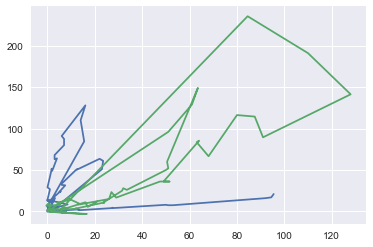

In [177]:
plt.plot(X['A'], X['B'])
plt.plot(X['B'], X['D'])

## matplotlib styles
To make the graph more estaetically pleasing

In [178]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

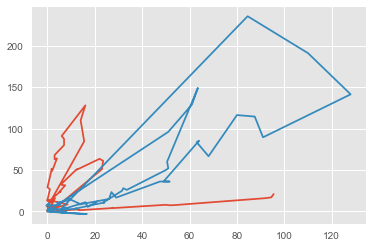

In [179]:
plt.style.use('ggplot')
plt.plot(X['A'], X['B'])
plt.plot(X['B'], X['D'])

## Markerstyle

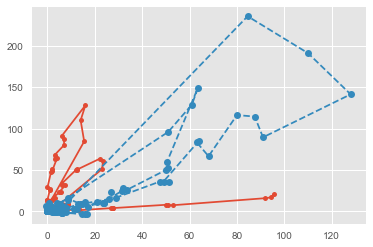

In [180]:
plt.plot(X['A'], X['B'], marker = '.', markersize = 10)
plt.plot(X['B'], X['D'], '--o')

## Object-oriented style

In [181]:
# tuple unpacking
a, b = (3,9)

Text(0, 0.5, 'Column 2')

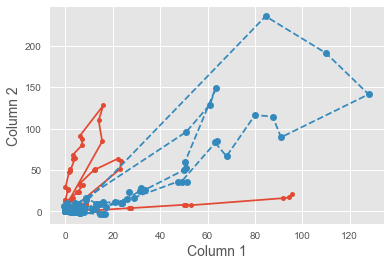

In [182]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)# returns a tuple
axes.plot(X['A'], X['B'], marker = '.', markersize = 10, label = 'A vs. B')
axes.plot(X['B'], X['D'], '--o',  label = 'A vs. B')
axes.set_xlabel('Column 1', size = 14)
axes.set_ylabel('Column 2', fontsize = 14)

## MATLAB-style
* title
* fontsizes
* xticks
* grid lines

Text(0.5, 1.0, 'this is title')

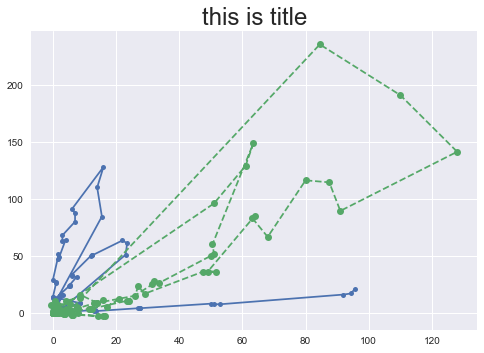

In [183]:
plt.style.use('seaborn')
plt.plot(X['A'], X['B'], marker = '.', markersize = 10)
plt.plot(X['B'], X['D'], '--o')
plt.title('this is title', fontsize = 24)

## Saving a plot
### object-oriented
* plt.savefig()
* plt.tight_layout() (automatically adjusts subplots paramters to fit into figure area)

### Matlab-style
* fig.savefig()
* fig.tight_layout()

In [184]:
# Matlab-style
fig, axes = plt.subplots(nrows = 1, ncols = 1)# returns a tuple
axes.plot(X['A'], X['B'], marker = '.', markersize = 10, label = 'A vs. B')
axes.plot(X['B'], X['D'], '--o',  label = 'A vs. B')
axes.set_xlabel('Column 1', size = 14)
axes.set_ylabel('Column 2', fontsize = 14)
fig.savefig('cols_vs_cols.png', dpi = )

SyntaxError: invalid syntax (<ipython-input-184-bd84c4d0d762>, line 7)

In [ ]:
# Object-oriented
# Make the plot
dpi = 300
plt.tight_layout() #shoudl be used!
plt.savefig('nanonose_boxplot_dpi_{}.png'.format(dpi), dpi = dpi)

## Matplotlib wrappers

### Boxplot - matplotlib

In [ ]:
Xdict = {}
for n,className in enumerate(classNames['class']):
    Xdict[className] = X[y['class'] == className]
Xdict['Ethanol'].head()

### Boxplot - pandas
Requires that the data is all in the same dataframe aka the command y.join(X)

In [ ]:
y.join(X).boxplot(column = 'A', by = 'class')
# to remove titles
plt.title('')
plt.suptitle('')

In [ ]:
plt.boxplot([Xdict['Water']['A'].values, Xdict['Ethanol']['A'].values], labels = ['Water', 'Ethanol'])

In [ ]:
plt.boxplot(Xdict['Water']['A'].values)
plt.boxplot(Xdict['Ethanol']['A'].values)

### Seaborn - boxplot
Requires that the data is all in the same dataframe aka the command y.join(X)

In [ ]:
sns.boxplot(x = 'class', y = 'A', data = y.join(X))

# 6. Heatmaps

Using the Zip Code data

* %matplot inline


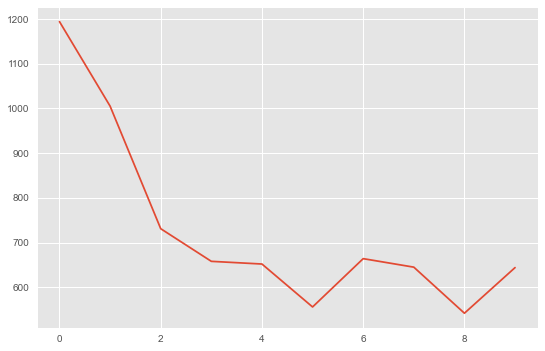

Variable               Type           Data/Info
-----------------------------------------------
C                      int            5
KNeighborsClassifier   ABCMeta        <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
M                      int            256
M_train                int            256
Mtest                  int            256
N                      int            2007
N_test                 int            2007
N_train                int            7291
X                      DataFrame               A          B    <...>\n\n[90 rows x 8 columns]
X_heatmap              ndarray        16x16: 256 elems, type `float64`, 2048 bytes
X_test                 DataFrame            pixel1  pixel2  pix<...>[2007 rows x 256 columns]
X_train                DataFrame            pixel1  pixel2  pix<...>[7291 rows x 256 columns]
Xdict                  dict           n=5
a                      int            3
attributeNames         list           n=8
axes                   Axe

In [264]:
# Load zipdata.mat (X_train, Y_train, etc)
%run Load_zipdata.ipynb
%whos

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
X_test.iloc[[1]]

<AxesSubplot:>

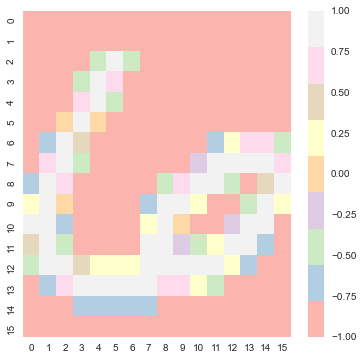

In [185]:
plt.figure(figsize = (6,6))

N, M        = X_test.shape
sqrt_M = int(np.sqrt(M))
X_heatmap = X_test.iloc[[1]].values.reshape(sqrt_M,sqrt_M) 
# sns.heatmap(X_heatmap, annot = True)
# annot annotates (= forsyne med noter) each pixel
sns.heatmap(X_heatmap, cmap = 'Pastel1')

# 7. Histograms


<AxesSubplot:>

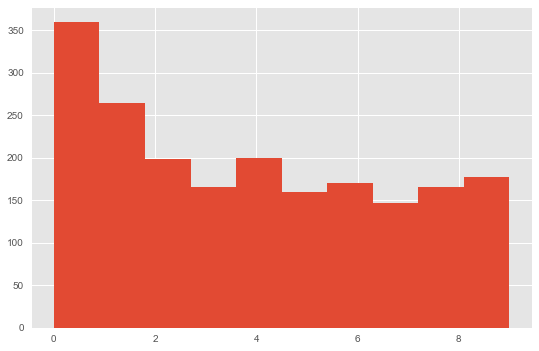

In [202]:
plt.style.use('ggplot')
y_test['class'].hist()
# if you want fewer bins/bars than the number of uniques, then use 'bins'
# y_test['class'].hist(bins = 3)


<AxesSubplot:>

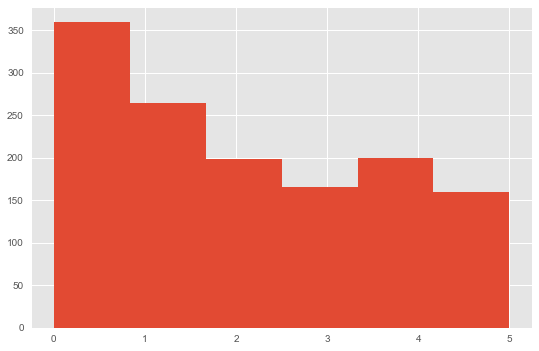

In [211]:
# show only certain unique values
unique_filter = y_test.loc[:, 'class'] <= 5
y_test['class'][unique_filter].hist(bins = 6)

<AxesSubplot:>

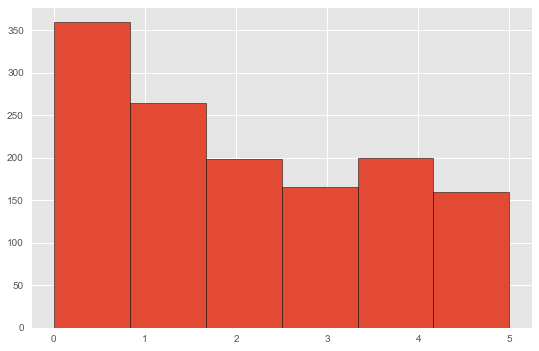

In [214]:
# include edgecolor
unique_filter = y_test.loc[:, 'class'] <= 5
y_test['class'][unique_filter].hist(bins = 6,
                                   edgecolor = 'k')

In [215]:
# plt.style.available

# 8. Subplots of images

In [216]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256
0,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,0.904,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,0.802,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


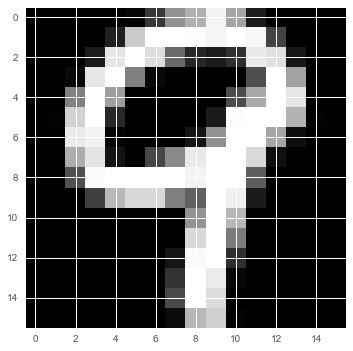

In [235]:
digits = {}
for n in range(10):
    digits['digit_idx{}'.format(n)] = X_test.loc[[n]].values.reshape(sqrt_M, sqrt_M)
plt.imshow(digits['digit_idx0'], cmap = 'gray')

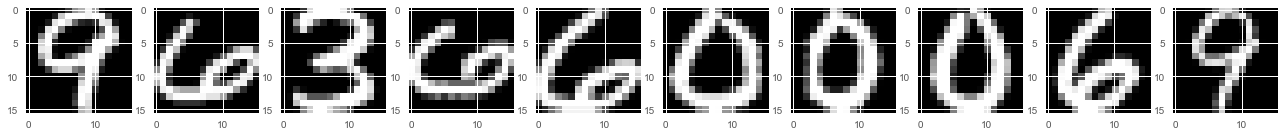

In [263]:
plt.figure(figsize = (20,2))

# iteration to plot all subplots
for i, digit in enumerate(digits.values()):
    plt.subplot(1, len(digits), i+1)
    plt.imshow(digits['digit_idx{}'.format(i)], cmap = 'gray')
    

In [253]:
len(digits)+1

11